In [117]:
import numpy as np
import matplotlib.pyplot as plt
import math
from helplers.q_chem import *

DATA_DIR = f"../data/HeBz"

cc_50 = np.load(f"{DATA_DIR}/CC_HeBz_50.npy", allow_pickle=True).item().keys()
cc_2545 = np.load(f"{DATA_DIR}/CC_HeBz_3D_2445_All.npy", allow_pickle=True).item().keys()

In [118]:
CC_2545_dists = []
CC_50_dists = []

for dist in cc_2545:

    coords = dist.split("___")

    x = float(coords[0])
    y = float(coords[1])
    z = float(coords[2])

    coord_en_vector = [x, y, z]

    CC_2545_dists.append(coord_en_vector)


for dist in cc_50:

    z = float(dist)

    coord_en_vector = [0, 0, z]

    CC_50_dists.append(coord_en_vector)


CC_2545_dists = np.array(CC_2545_dists)
CC_50_dists = np.array(CC_50_dists)

In [119]:
def plot_benzene_mol(ax, scale=20):

    z_val = 0.000000

    benzene = f"""
    C    -1.2073830   -0.6970829    {z_val}
    C    -1.2073830    0.6970829    {z_val}
    C     0.0000000    1.3941659    {z_val}
    C     1.2073830    0.6970829    {z_val}
    C     1.2073830   -0.6970829    {z_val}
    C     0.0000000   -1.3941659    {z_val}
    H    -2.1490090   -1.2407309    {z_val}
    H    -2.1490090    1.2407309    {z_val}
    H     0.0000000    2.4814619    {z_val}
    H     2.1490090    1.2407309    {z_val}
    H     2.1490090   -1.2407309    {z_val}
    H     0.0000000   -2.4814619    {z_val}"""


    # Create a list to store atomic positions
    positions = []
    atom_positions = []

    for line in benzene.split("\n"):
        if line:
            line = line.split()
            atom, x, y, z = line[0], float(line[1]), float(line[2]), float(line[3])
            atom_positions.append([atom, x, y, z])
            positions.append([x, y, z])

    # Add bonds between adjacent carbon atoms

    bonds = [
        (0, 1),
        (1, 2),
        (2, 3),
        (3, 4),
        (4, 5),
        (5, 0),
        (0, 6),
        (1, 7),
        (2, 8),
        (3, 9),
        (4, 10),
        (5, 11),
    ]
    for start, end in bonds:

        ax.plot(
            *zip(positions[start], positions[end]),
            color="darkgray",
            linestyle="-",
            linewidth=5,
        )

    h_size = 1.5
    c_size = 3

    # Plot atoms
    for i, atom_pos in enumerate(atom_positions):

        (atom, x, y, z) = atom_pos[0], atom_pos[1], atom_pos[2], atom_pos[3]

        size = (c_size if atom == "C" else h_size) * scale
        color = "dimgray" if atom == "C" else "silver"

        ax.plot(x, y, "o", label=f"C{i+1}", markersize=size, color=color)


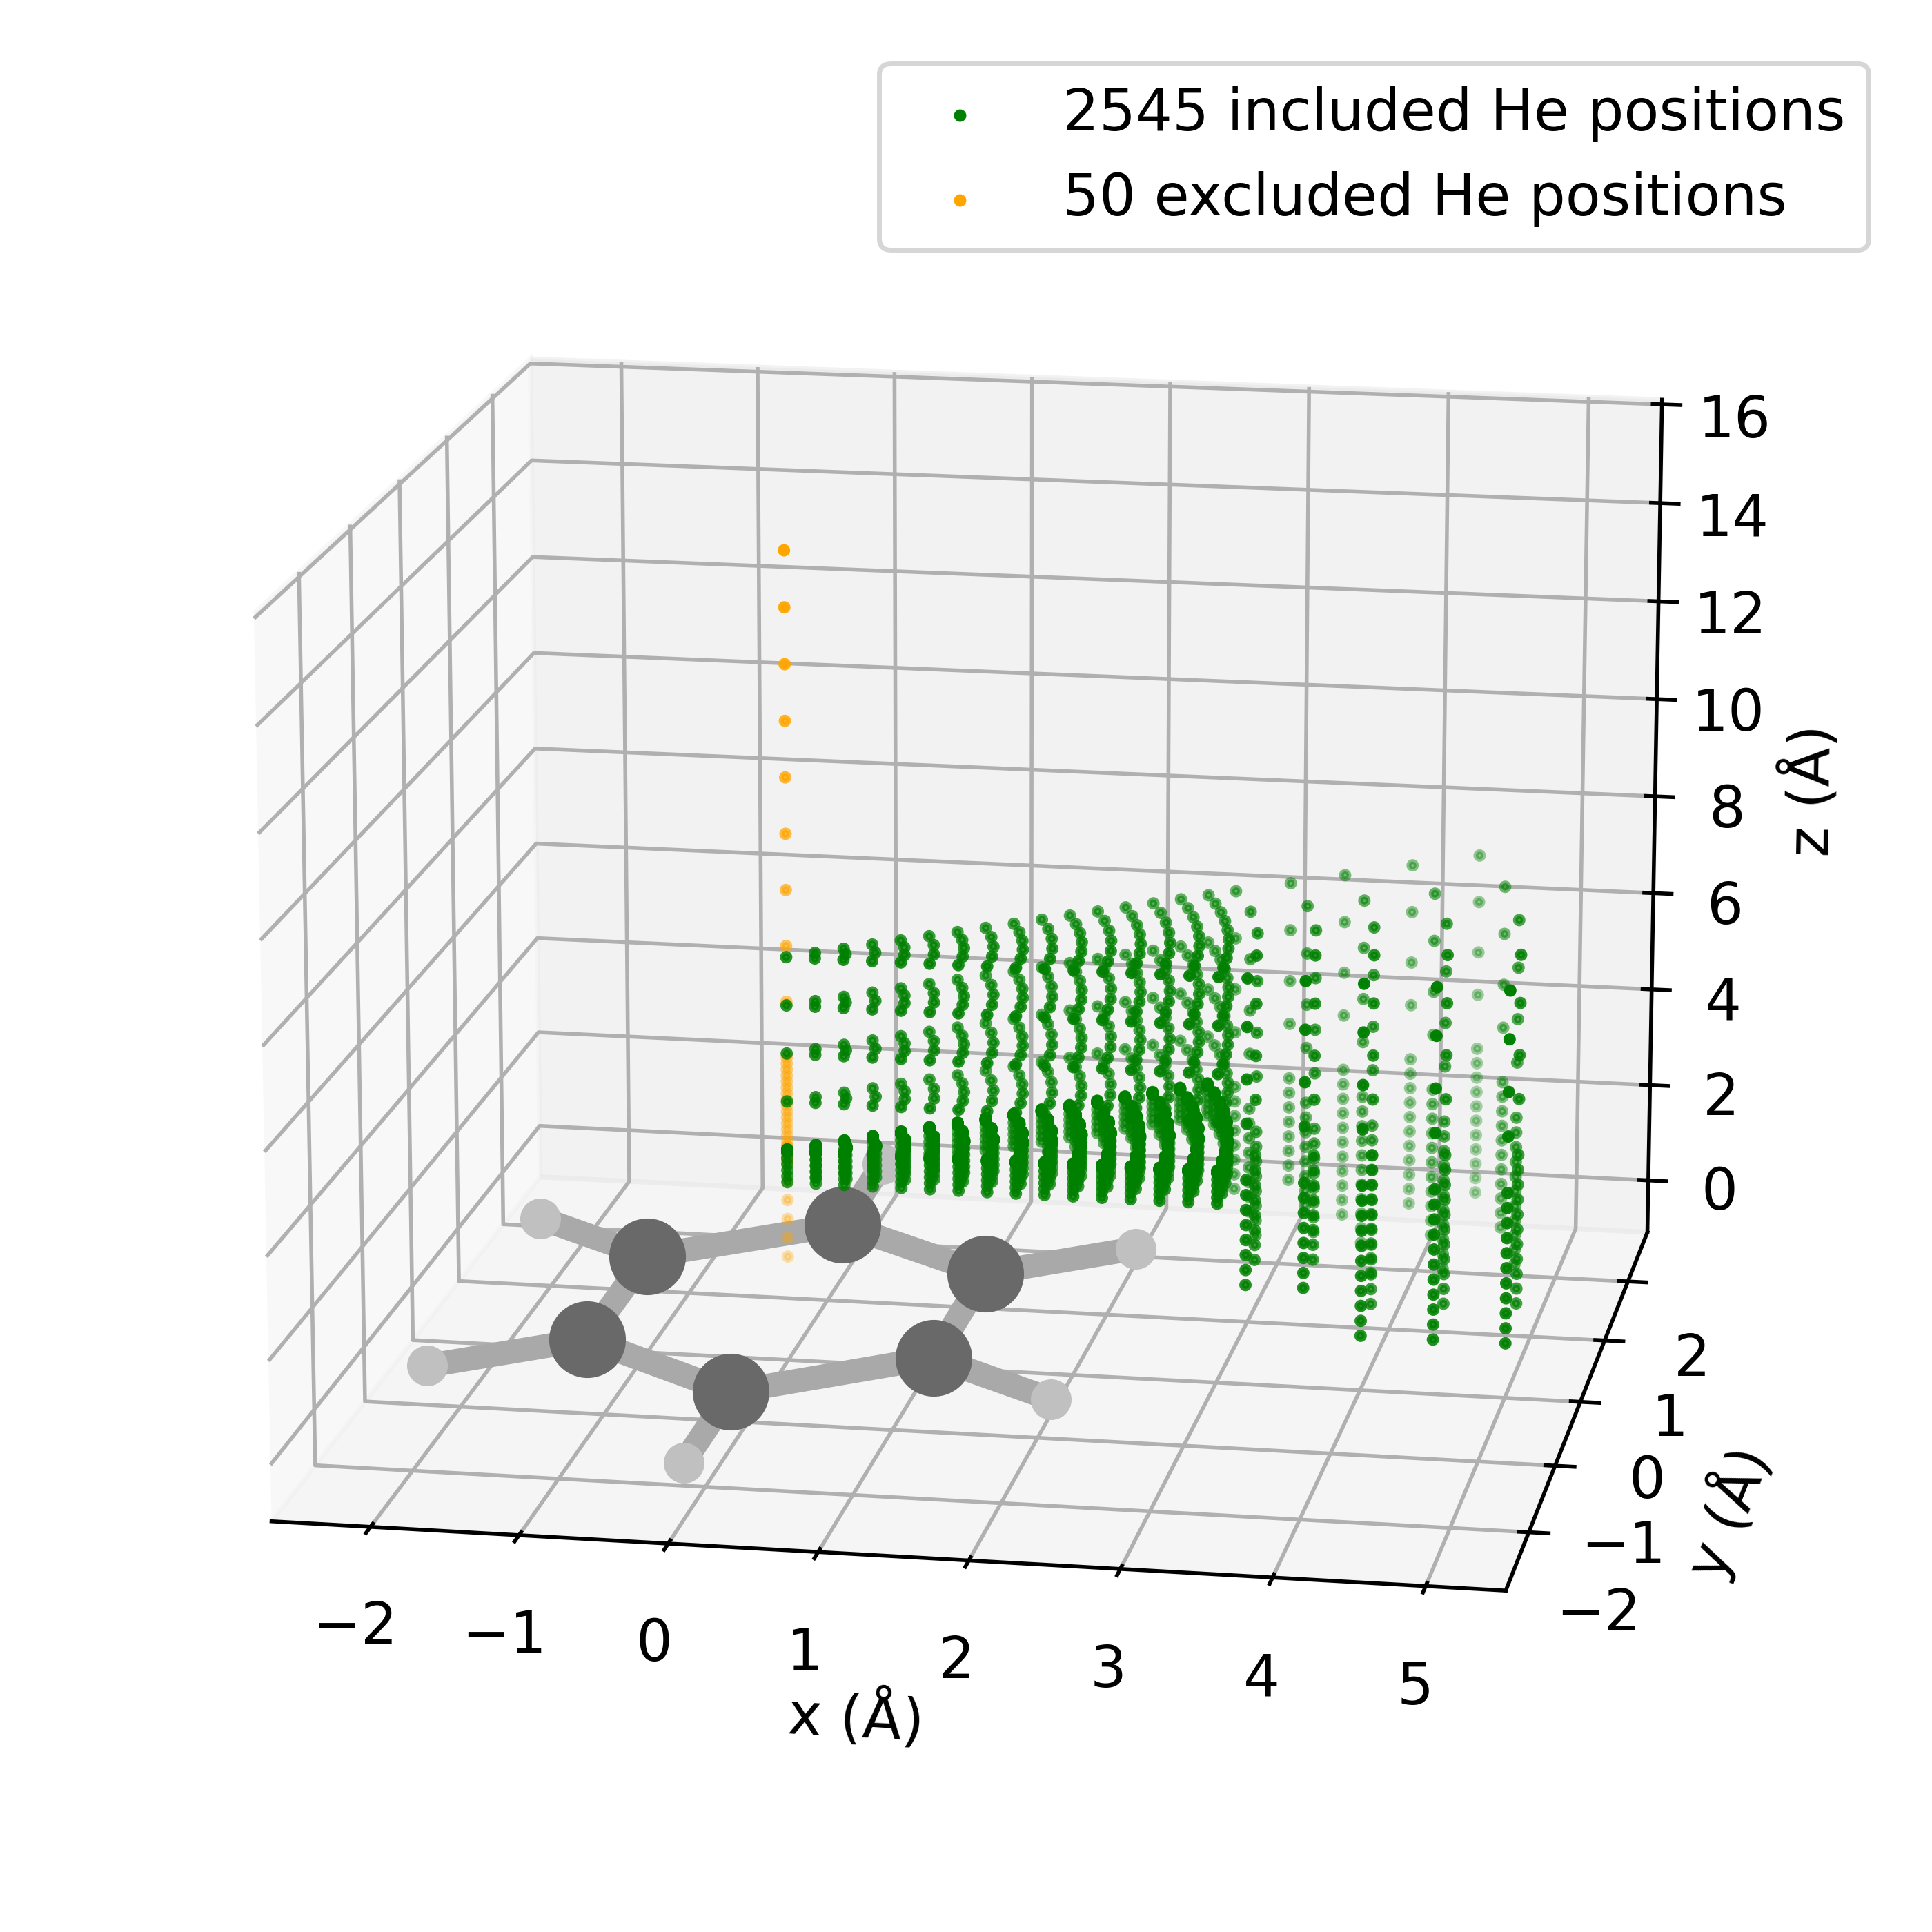

In [120]:
from helplers.he_bz_pes_plot import *

fig = plt.figure(figsize=(10, 6), dpi=500)
fig.subplots_adjust(left=0.05, right=0.9, bottom=0.05, top=0.95)

ax = fig.add_subplot(111, projection="3d")



ax.scatter(
    CC_2545_dists[:, 0],
    CC_2545_dists[:, 1],
    CC_2545_dists[:, 2],
    c="green",
    marker=".",
    s=10,
    label="2545 included He positions",
)
ax.scatter(
    CC_50_dists[:, 0],
    CC_50_dists[:, 1],
    CC_50_dists[:, 2],
    c="orange",
    marker=".",
    s=10,
    label="50 excluded He positions",
)

# 4. Set labels and ticks, adding 'labelpad' to create space.
ax.set_xlabel(r"x ($\mathrm{\AA}$)", fontsize=axes_label_size)
ax.set_ylabel(r"y ($\mathrm{\AA}$)", fontsize=axes_label_size)
ax.set_zlabel(r"z ($\mathrm{\AA}$)", fontsize=axes_label_size)

ax.xaxis.set_tick_params(labelsize=x_tick_size)
ax.yaxis.set_tick_params(labelsize=y_tick_size)
ax.zaxis.set_tick_params(labelsize=y_tick_size)

plt.legend(fontsize=legend_font_size)

plot_benzene_mol(ax, scale=5)

# 5. Set the desired viewing angle
ax.view_init(elev=15, azim=-80)

plt.show()